**Python implentation of a neural network model using scikit-learn**

(Possibly the shortest code to run a neural network model)
 

  Dataset: Wisconsin breast cancer dataset

Comments in Japanese:
フィードフォワード　ニューラルネットワークモデルのPython実装、データは乳がんdataset

In [1]:
# Import libraries and modules (ライブラリーおよびモジュールのインポート)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # データの標準化用
from sklearn.model_selection import train_test_split  # 訓練データ・テストデータ分割用
from sklearn.neural_network import MLPClassifier  # 分類用のニューラルネットワークモデル
from sklearn.metrics import confusion_matrix # 混合行列用

In [2]:
# Load breast cancer data (class labels and 30 features)
# 乳がんデータを読み込む（クラスラベルと特徴量である30個の変数）
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' 
                 'breast-cancer-wisconsin/wdbc.data',header=None)

In [3]:
# Specify the 30 features as the explanatory variables
# For the target variable, convert xlabels benign (B) and malignant (M) to 1 and 0, respectively
# 30個の特徴量を説明変数に指定
# 目的変数のクラスラベル（良性B,悪性M）を１,０に変換
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
# Split the dataset (訓練データとテストデータに分ける)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1,
                                                    stratify=y)

In [5]:
# Standardize the explanatory variables (説明変数の標準化）
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [6]:
# Execute MLPClassifier() to implement a neural network model
# MLPClassifier() を使ったニューラルネットモデルの実行
nnet = MLPClassifier(activation="logistic",max_iter=1000,hidden_layer_sizes=(32,16,8,4),
                     random_state=1,solver="adam")
nnet.fit(X_train_std,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 16, 8, 4),
              max_iter=1000, random_state=1)

In [7]:
#help(MLPClassifier)

<AxesSubplot:>

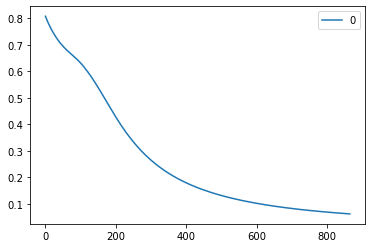

In [8]:
pd.DataFrame(nnet.loss_curve_).plot()

In [9]:
# 訓練データでのｙの予測値とテストデータでのｙの予測値
y_train_predvalue2 = nnet.predict(X_train_std)
y_test_predvalue2 = nnet.predict(X_test_std)

# Accuracy （正解率）
from sklearn.metrics import accuracy_score
print('ニューラルネット正解率(train): %.3f' % accuracy_score(y_train,y_train_predvalue2))
print('ニューラルネット正解率(test): %.3f' % accuracy_score(y_test,y_test_predvalue2))
# Confusion matrix （混合行列）
conmat2 = confusion_matrix(y_test, y_test_predvalue2)
print('Confusion matrix:\n{}'.format(conmat2))

ニューラルネット正解率(train): 0.997
ニューラルネット正解率(test): 0.969
Confusion matrix:
[[141   2]
 [  5  80]]
